(<matplotlib.image.AxesImage at 0x18ab4c2a1c8>, Text(0.5, 1.0, 'Grayscale'))

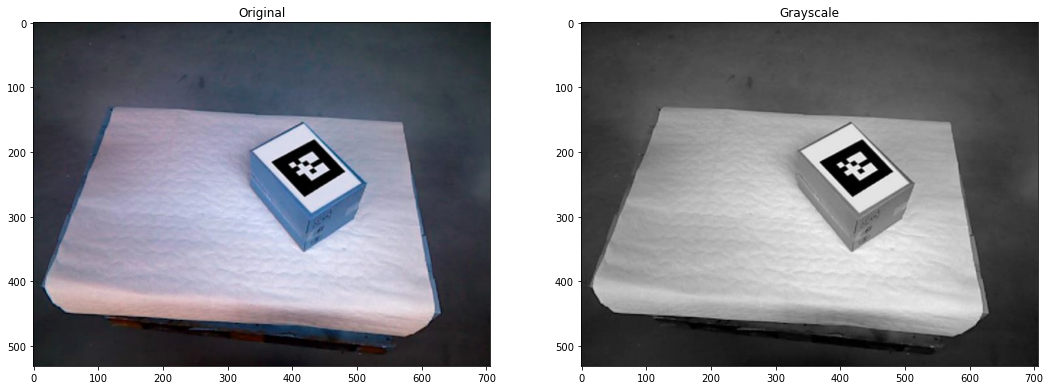

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('ARTag3.jpg')
# plt.figure(figsize = (18, 10))
# plt.imshow(im)
# plt.show()
im1 = im.copy()
pic = im.copy()

imgray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
# plt.figure(figsize = (18, 10))
# plt.imshow(imgray, cmap = 'gray')
# plt.show()

fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(im), ax1.set_title("Original")
ax2.imshow(imgray, cmap='gray'), ax2.set_title("Grayscale")

(<matplotlib.image.AxesImage at 0x18ab741c048>, Text(0.5, 1.0, 'Contour'))

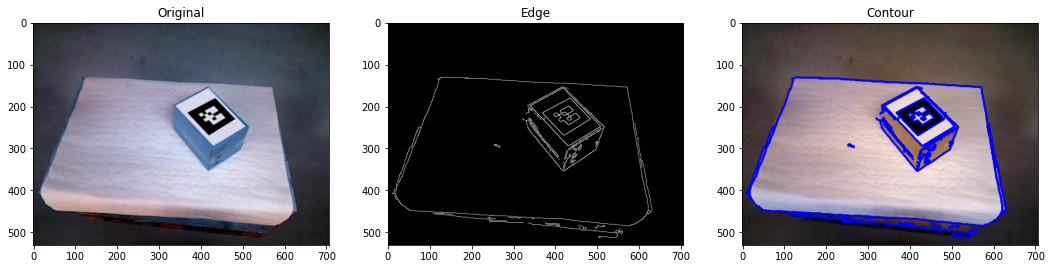

In [2]:
edges = cv.Canny(imgray, threshold1 = 20, threshold2 = 150, apertureSize = 3)
# plt.figure(figsize = (18, 10))
# plt.imshow(edges, cmap = 'gray')
# plt.show()

im_, contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

cv.drawContours(im1, contours, -1, (255, 0, 0), 3)
im2 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
# plt.figure(figsize = (18, 10))
# plt.imshow(im1, cmap = 'gray')
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
ax1.imshow(im), ax1.set_title("Original")
ax2.imshow(edges, cmap='gray'), ax2.set_title("Edge")
ax3.imshow(im2), ax3.set_title("Contour")


0.7073766622348089
45
[[[434 181]]

 [[481 231]]

 [[419 269]]

 [[369 216]]]


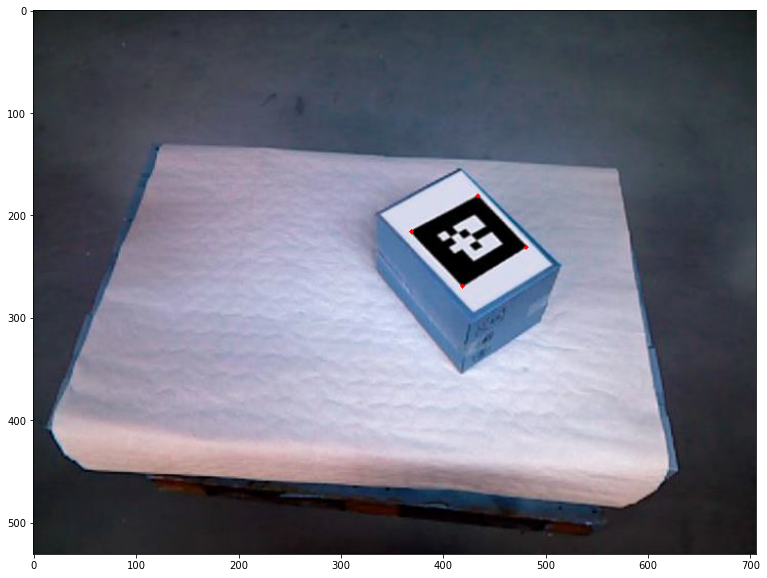

In [3]:
circularity = np.zeros(len(contours))
for i in range(len(contours)):
    perimeter = cv.arcLength(contours[i], True)
    area = cv.contourArea(contours[i])
    if perimeter == 0:
        circularity[i] = 0
    else:
        circularity[i] = 4*3.14*(area/(perimeter*perimeter))

for index, cirl in enumerate(circularity):
    
    if cirl > 0.70 and cirl < 0.72 and cv.contourArea(contours[index]) > 100:
        print(cirl)
        print(index)
        id = index
        

epsilon = 0.1*cv.arcLength(contours[id],True)
approx = cv.approxPolyDP(contours[id],epsilon,True)

print(approx)
cv.drawContours(pic, approx, -1, (255, 0, 0), 3)
plt.figure(figsize = (18, 10))
plt.imshow(pic)
plt.show()

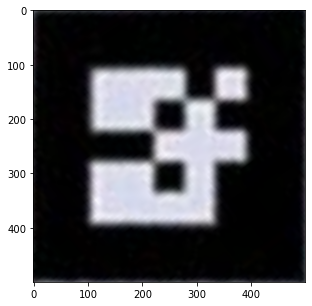

In [6]:
pts1 = np.float32([approx[0], approx[1], approx[2], approx[3]])
pts2 = np.float32([(0,0),(0,500),(500,500),(500,0)])
H = cv.getPerspectiveTransform(pts1,pts2)
ImagTransf = cv.warpPerspective(pic.copy(), H, (500,500))
plt.figure(figsize = (5, 5))
plt.imshow(ImagTransf)
plt.show()